**Документация sklearn: https://scikit-learn.org/stable/   
Неофициальный перевод на русский: https://scikit-learn.ru/**

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

## Задачи, решаемые машинным обучением

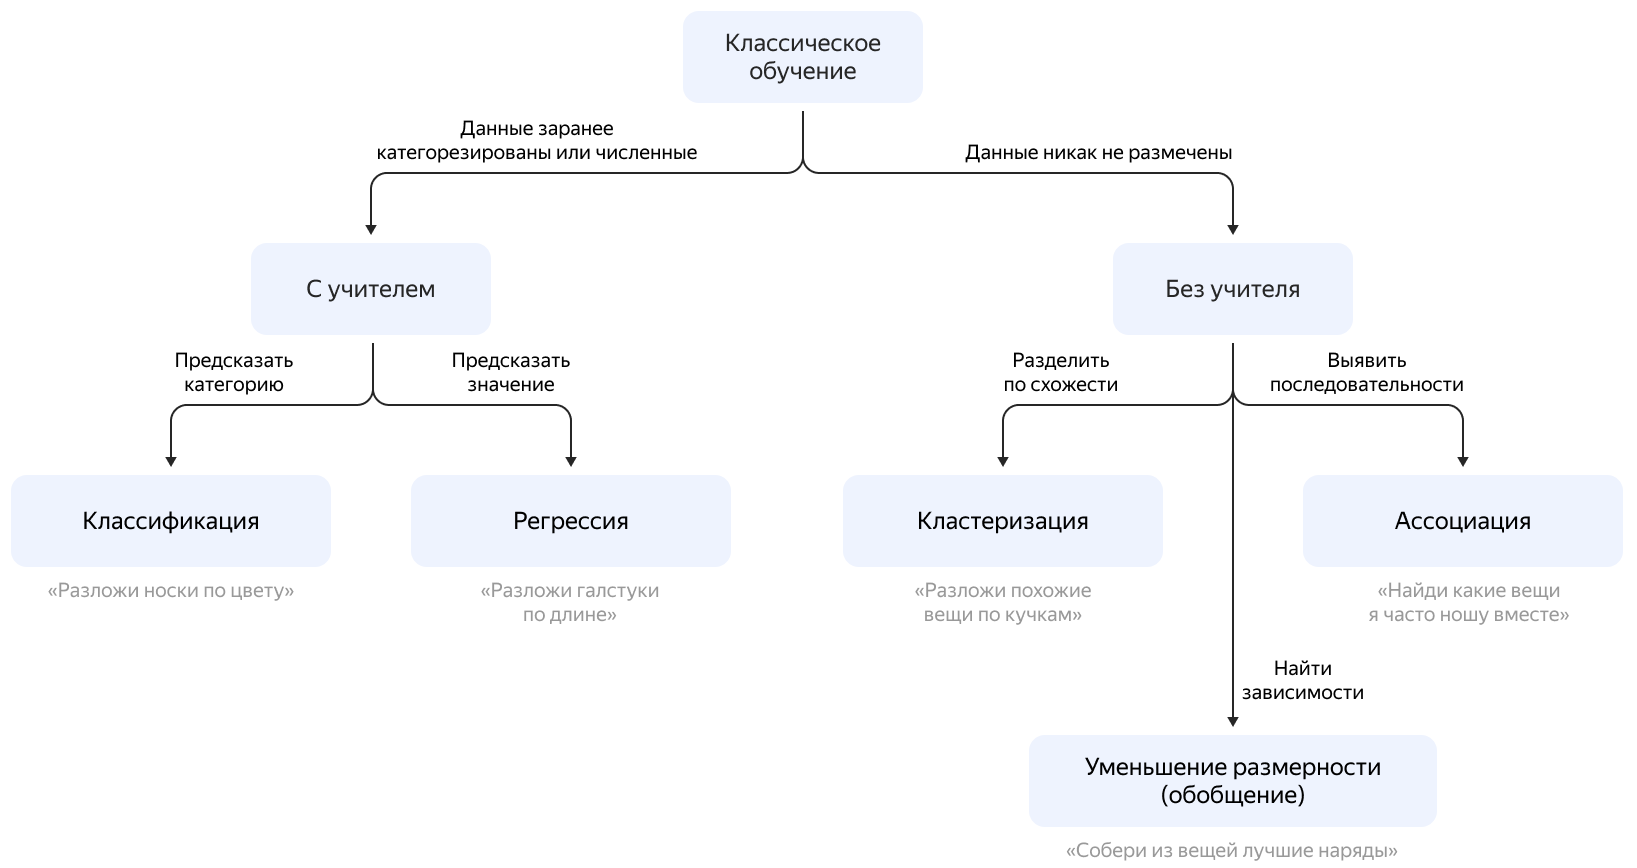  
*картинка из статьи https://cloud.yandex.ru/blog/posts/2022/10/machine-learning

В рамках блока по машинному обучению (далее ML, machine learning) мы ознакомимся с некоторыми решениями для задач:  
- регрессии
- классификация
- кластеризации

В этой практике мы попробуем решить обычную задачу линейной регрессии, также попробуем полиномиальную регрессию.

Создадим синтетический датасет с зависимостью некоторого **y** от **x**.  
Т.е. есть некоторая зависимость $ y=\beta_0 + \beta_1*x + \epsilon $
- $ y $ -- это зависимая переменная (целевая переменная);  
- $ \beta_0, \beta_1 $ -- какие-то коэффициенты, которые мы хотим определить;  
- $ x $ -- независимая переменная;  
- $ \epsilon $ -- случайная ошибка.

Давайте на конкретном примере поясню каждого члена этого уравнения.  
Допустим, что $y$ -- длина тормозного пути. Она зависит от кучи параметров, но мы попорбуем построить модель, которая сможет предсказать нам длину тормозного пути $y$ от скорости автомобиля в момент начала торможения $x$.  

Согласитесь, что всё-таки в реальном мире такой $ y $ не зависит идеально от $ x $. Т.е. даже если мы знаем коэффициенты $ \beta_0 $ и $ \beta_1$, в реальности же $ y $ не всегда будет равен $\beta_0 + \beta_1*x$, а будет как-то от этого значения отличаться. Поэтому мы добавляем этот эпсилон ($ \epsilon$) -- это ошибка.  

Пример.
Допустим, есть уравнение  $ y= 1 + 2*x$. Зависимость какого-то игрека от какого-то икса. И есть у нас фактическое наблюдение (3, 8). Т.е. когда икс был равен 3 игрек был равен 8. Но если мы подставим 3 в уравнение, то получим игрек равный 7. Наша модель ошибается (ну или данные не совсем идеально на неё ложатся). Поэтому, чтобы посчитать именно настоящий игрек, надо добавить в модель этот самый эпсилон.  
И в итоге получается уравнение $ y_{real}=\beta_0 + \beta_1*x + \epsilon $ (обратите внимание, что я пищу не $y$, а $y_{real}$, т.е. истинное значение. 

У есть как раз требование, что этот самый эпсилон распределён нормально.

При этом, когда мы решаем задачку линейной регрессии, мы на этот эпсилон внимания не обращаем. Для простоты считаем, что эпсилон равен 0. Тогда остаётся только определить коэффициенты.  
Как?

Минимизировать квадрат ошибки, т.е. минимизировать величину  
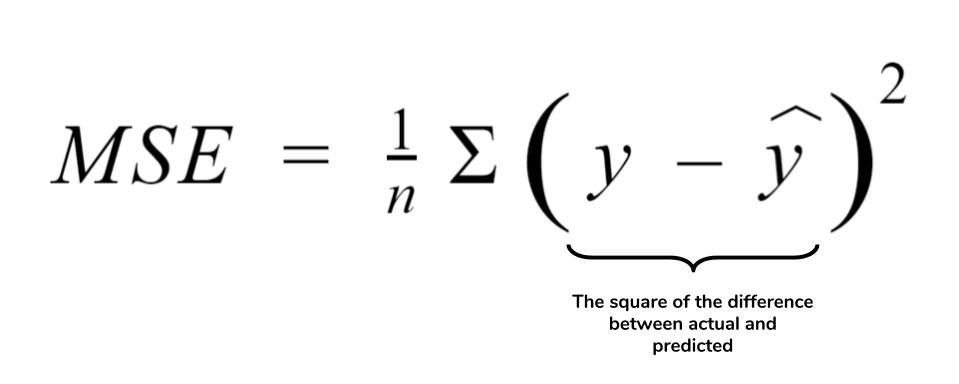  

Эта задача имеет аналитическое решение, но на практике для выборок больше 10-20к записей используют градиентные методы. О них поговорим позже.

Теперь немного примеров, чтобы стало понятнее.

## Пояснение на примерах

Допустим, что длина тормозного пути машины зависит от начальной скорости в момент торможение по закону $ y=\beta_0 + \beta_1*x$.  

Сгенерируем синтетическую выборку с какими-то значениями для бета0 и бета1, а потом попытается их определить.

In [2]:
beta0 = 10 
beta1 = 0.75
x = np.random.randint(low=10,high=150, size=100) # создадим массив случайных иксов (скорость машины)y = beta0 + beta1 * x # создадим массив игреков (длина торможение в метрах по нашей формуле)
y = beta0 + beta1 * x # находим длину тормозного пути по формуле

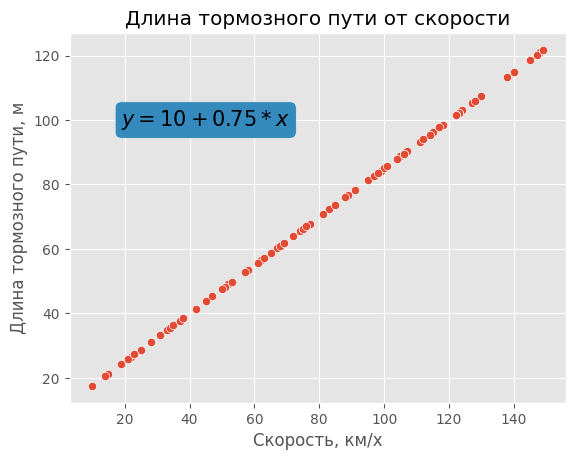

In [3]:

sns.scatterplot(x=x, y=y)

plt.title('Длина тормозного пути от скорости')
plt.xlabel('Скорость, км/x')
plt.ylabel('Длина тормозного пути, м')

plt.text(45, 100, "$ y = 10 + 0.75 *x $", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="round")
         )

plt.show()

Получается идеальная зависимость. Мы можем определить.  

Допустим, что у нас есть только икс и игрек, но нет коэффициентов, мы не знаем, как одно зависит от другого. Хотим понять.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# перед обучением нужно превратить икс из вектора-строки в вектор-столбец
x

array([ 98,  21,  88,  62, 117, 117,  52,  99,  14,  22, 115, 138,  50,
        67, 114,  33,  83,  85,  10,  65,  81,  74,  34,  53,  77, 111,
       117, 124, 124, 130,  38,  35, 130, 122, 105, 107,  31,  19,  15,
        91,  47,  38, 140, 123, 127,  85,  88,  68, 148,  69,  75,  15,
        58,  57,  42,  25,  14, 100, 123, 106,  21,  62, 122, 148,  75,
        28,  37,  88, 118, 148,  76, 147,  61,  23, 104, 106, 117,  95,
        51,  23, 112, 140, 145, 149, 127,  63,  45,  89, 101, 122,  38,
       149,  97,  72,  50,  98,  88, 122, 128, 122])

In [6]:
x = x.reshape(-1, 1) # посмотрите на разницу. (-1, 1) значит взять все строки (-1) и засунуть их в 1 столбец.
x

array([[ 98],
       [ 21],
       [ 88],
       [ 62],
       [117],
       [117],
       [ 52],
       [ 99],
       [ 14],
       [ 22],
       [115],
       [138],
       [ 50],
       [ 67],
       [114],
       [ 33],
       [ 83],
       [ 85],
       [ 10],
       [ 65],
       [ 81],
       [ 74],
       [ 34],
       [ 53],
       [ 77],
       [111],
       [117],
       [124],
       [124],
       [130],
       [ 38],
       [ 35],
       [130],
       [122],
       [105],
       [107],
       [ 31],
       [ 19],
       [ 15],
       [ 91],
       [ 47],
       [ 38],
       [140],
       [123],
       [127],
       [ 85],
       [ 88],
       [ 68],
       [148],
       [ 69],
       [ 75],
       [ 15],
       [ 58],
       [ 57],
       [ 42],
       [ 25],
       [ 14],
       [100],
       [123],
       [106],
       [ 21],
       [ 62],
       [122],
       [148],
       [ 75],
       [ 28],
       [ 37],
       [ 88],
       [118],
       [148],
       [ 76],
      

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # разобьем на трейн и тест

In [8]:
model = LinearRegression() # создаём модель

model.fit(x_train, y_train) # учим (аналитическое решение методом наименьших квадратов)

y_pred = model.predict(x_test) # считаем предсказания на тестовой выборке

In [9]:
def print_metrics(y_true, y_pred):
    """Функция для вывода наших метрик"""
    print('~'*20)
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R_squared", r2_score(y_true, y_pred))
    print('~'*20)

In [10]:
print_metrics(y_test, y_pred)

~~~~~~~~~~~~~~~~~~~~
RMSE: 2.929642751054232e-15
R_squared 1.0
~~~~~~~~~~~~~~~~~~~~


Ошибка безумно мала, $R^2$ равен 1, т.е. наша модель шикарна.  
Что и ожидалось, ведь тут идеальная зависимость. А теперь добавим в исходные данные шум, то есть тот самый эпсилон, ошибку.

Уравнение: $ y=\beta_0 + \beta_1*x + \epsilon$
и при этом $ \epsilon\sim \mathcal{N}(0,\,\sigma^{2})$.  
Т.е. эпсилон распреден нормально с некоторыми параметрами средним 0 (потому что ошибка в обе стороны должна быть, как в плюс,так и в минус) и стандартным отклонение сигма в квадрате.  
Мы их, конечно, тоже не знаем, но для создания синтетической выборки дадим им какие-то значение, чтобы ошибку смоделировать.

In [11]:
beta0 = 10 
beta1 = 0.75
x = np.random.randint(low=10,high=150, size=100) # создадим массив случайных иксов (скорость машины)y = beta0 + beta1 * x # создадим массив игреков (длина торможение в метрах по нашей формуле)

mu = 0
sigma = 5
errors = np.random.normal(loc=mu, scale=sigma, size=100) # так как у нас сто точек, то создадим сто ошибок

y = beta0 + beta1 * x + errors# находим длину тормозного пути по формуле


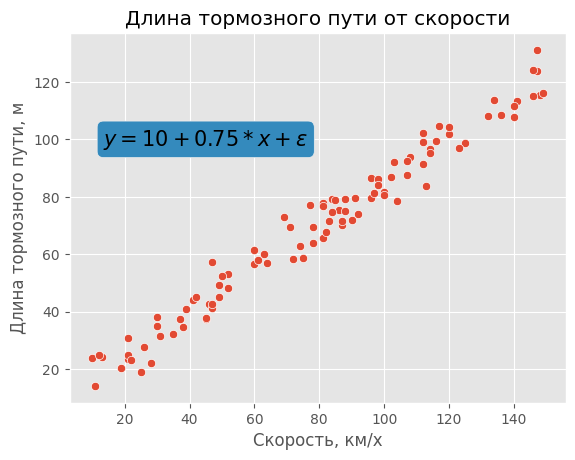

In [12]:

sns.scatterplot(x=x, y=y)

plt.title('Длина тормозного пути от скорости')
plt.xlabel('Скорость, км/x')
plt.ylabel('Длина тормозного пути, м')

plt.text(45, 100, "$ y = 10 + 0.75 *x + \epsilon $", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="round")
         )

plt.show()

In [13]:
x = x.reshape(-1, 1) # превращение в вектор-столбец
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # разобьем на трейн и тест

model = LinearRegression() # создаём модель

model.fit(x_train, y_train) # учим (аналитическое решение методом наименьших квадратов)

y_pred = model.predict(x_test) # считаем предсказания на тестовой выборке

print_metrics(y_test, y_pred)

~~~~~~~~~~~~~~~~~~~~
RMSE: 5.0409195325020395
R_squared 0.9743305900566681
~~~~~~~~~~~~~~~~~~~~


Уже ошибочка вырисовывается. И она лишь потому, что наши реальные данные не совсем идеально подчиняются тому уравнению, которое мы нашли. Посмотрим, какое уравнение нашли.  

Напомню, данные генерировались по формуле $ y=10 + 0.75*x + \epsilon$

In [14]:
print('beta0:',model.intercept_)
print('beta1:',model.coef_)

beta0: 9.978759990580016
beta1: [0.75094823]


А теперь уберем гомоскедастичность. Теперь наши случайные ошибки не будут распределены одинаково, т.е. стандартное отклонение (ну и соответственно дисперсия) будут разными у них.

In [15]:
beta0 = 10 
beta1 = 0.75
x = np.sort(np.random.randint(low=10,high=150, size=100)) # создадим массив случайных иксов (скорость машины)y = beta0 + beta1 * x # создадим массив игреков (длина торможение в метрах по нашей формуле)

std_list = [0, 10, 25, 50]

# созадим список из 4 векторов. сконвертируем их в вектор из 4 элементов, где каждый элемент -- тоже вектор из 25 элементов
# сделаем reshape, чтобы просто получить 1 вектор длиной 100 элментов
errors = np.array([np.random.normal(loc=0, scale=sigma, size=25) for sigma in std_list]).reshape(1, -1)[0] 

y = beta0 + beta1 * x + errors # находим длину тормозного пути по формуле


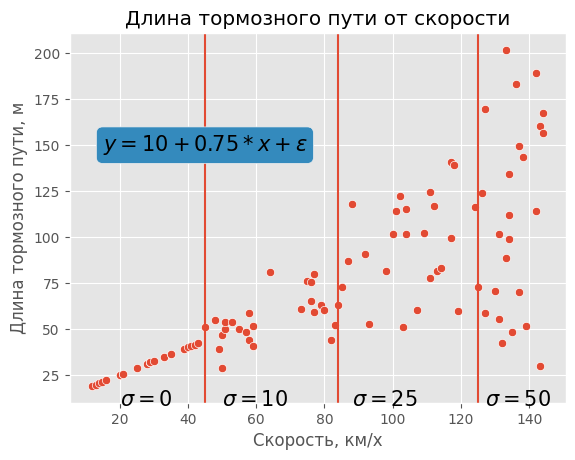

In [16]:

sns.scatterplot(x=x, y=y)

plt.title('Длина тормозного пути от скорости')
plt.xlabel('Скорость, км/x')
plt.ylabel('Длина тормозного пути, м')

plt.text(45, 150, "$ y = 10 + 0.75 *x + \epsilon $", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="round")
         )

plt.axvline(x[25])
plt.axvline(x[50])
plt.axvline(x[75])
plt.text(x[5], 8, "$ \sigma = 0$", size=15)
plt.text(x[28], 8, "$ \sigma = 10$", size=15)
plt.text(x[53], 8, "$ \sigma = 25$", size=15)
plt.text(x[78], 8, "$ \sigma = 50$", size=15)

plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1),  y, test_size=0.25) # разобьем на трейн и тест

model = LinearRegression() # создаём модель

model.fit(x_train, y_train) # учим (аналитическое решение методом наименьших квадратов)

y_pred = model.predict(x_test) # считаем предсказания на тестовой выборке

print_metrics(y_test, y_pred)

~~~~~~~~~~~~~~~~~~~~
RMSE: 28.73508422421924
R_squared 0.5461289499525661
~~~~~~~~~~~~~~~~~~~~


Модель отстой, так как не выполняется гомоскедастичност данных. Непонятно, как линию идеально вписать в данные...  
Посмотрим на графике

In [18]:
print('beta0:',model.intercept_)
print('beta1:',model.coef_)

beta0: 8.236875853479091
beta1: [0.79359484]


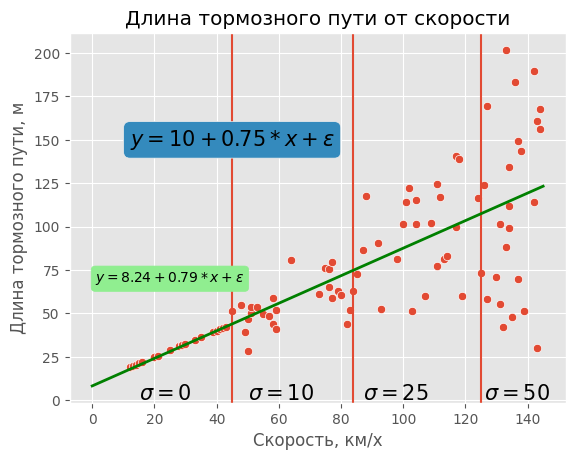

In [19]:
sns.scatterplot(x=x, y=y)

plt.title('Длина тормозного пути от скорости')
plt.xlabel('Скорость, км/x')
plt.ylabel('Длина тормозного пути, м')

plt.text(45, 150, "$ y = 10 + 0.75 *x + \epsilon $", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="round")
         )

plt.axvline(x[25])
plt.axvline(x[50])
plt.axvline(x[75])
plt.text(x[3], 0, "$ \sigma = 0$", size=15)
plt.text(x[28], 0, "$ \sigma = 10$", size=15)
plt.text(x[52], 0, "$ \sigma = 25$", size=15)
plt.text(x[76], 0, "$ \sigma = 50$", size=15)

# отрисуем найденное уравнение
x2 = np.linspace(0, 145, 2) # получим три икса (нам достаточно двух точек, потому что у нас просто линия)
y2 = model.coef_ * x2 + model.intercept_

plt.plot(x2, y2, color='green', linewidth=2)

plt.text(25, 70, f"$ y = {model.intercept_:.2f} + {model.coef_[0]:.2f} *x + \epsilon $", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="round", color='lightgreen'))

plt.show()

# Практика

In [1]:
data = sns.load_dataset('tips')
data

NameError: name 'sns' is not defined

Вспомним датасет с размером чаевых. Попробуем научиться предсказывать размер чаевых по размеру счёта.

1. Визуализируйте зависимость размера чаевых (tip) от суммы счёта (total_bill) (Можете воспользоваться scatterplot или jointplot).

In [21]:
# попробуйте также regplot

2. Создайте вектор-столбец с суммой счета и вектор с размером чаевых. Разбейте данные на трейн и тест.

3. Обучите модель линейной регрессии. Посчитайте значение для метрик RMSE и $R^2$.

4. Попробуем теперь полиномиальную регрессию. Создайте датафрейм из 5 столбцов, где каждый столбец -- размер счёта в степени, равной номеру столбца. Т.е. в первом столбце сумма счёта, во втором -- сумма счёта в квадрате, в третьем -- сумма счёта в кубе. И тд.  

*Можете сделать это руками, а можете с помощью PolynomialFeatures: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

5. Обучите модель. Постройте график для обученной модели (можете воспользоваться примером, который есть в этом ноутбуке, но учтите, что у Вас не линия, а полином, поэтому нужно много точек).

6. Посчитайте метрики. Стало ли лучше?